In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [9]:
mean = df[['AGE','BMI','BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']].mean()
var = df[['AGE','BMI','BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']].var()

print(f"Mean\n{mean}\n\nVariance\n{var}")

Mean
AGE     48.518100
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

Variance
AGE     171.846610
BMI      19.519798
BP      191.304401
S1     1197.717241
S2      924.955494
S3      167.293585
S4        1.665261
S5        0.272892
S6      132.165712
Y      5943.331348
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

<Axes: title={'center': 'Y'}, xlabel='SEX'>

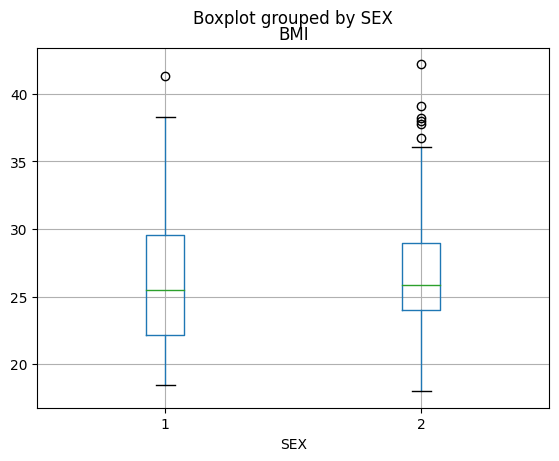

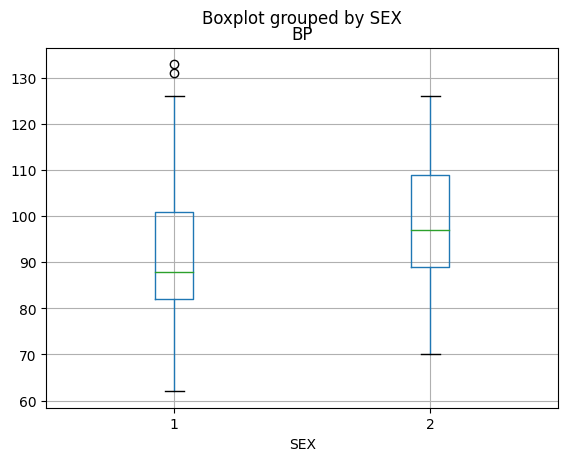

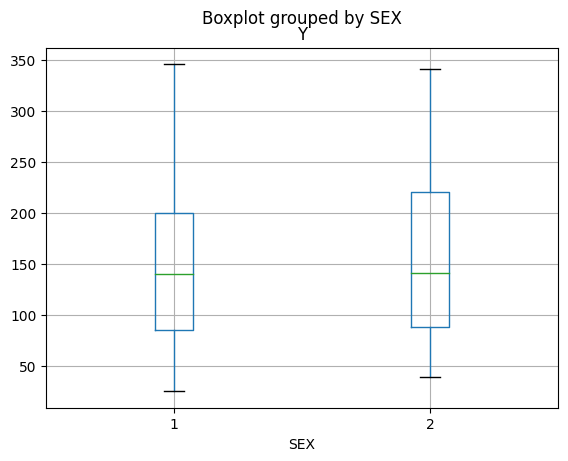

In [15]:
df.boxplot(column='BMI', by='SEX')
df.boxplot(column='BP', by='SEX')
df.boxplot(column='Y', by='SEX')

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

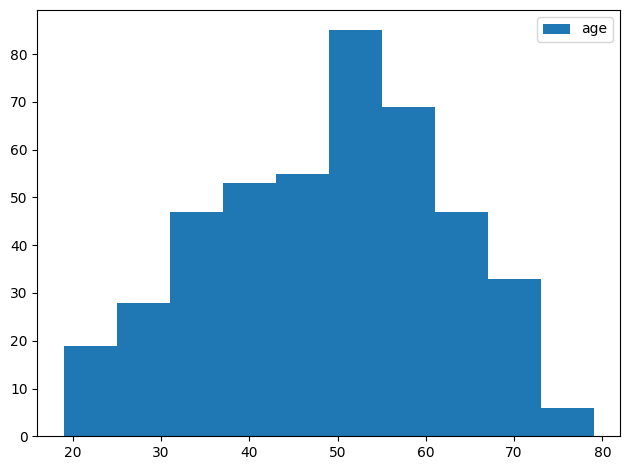

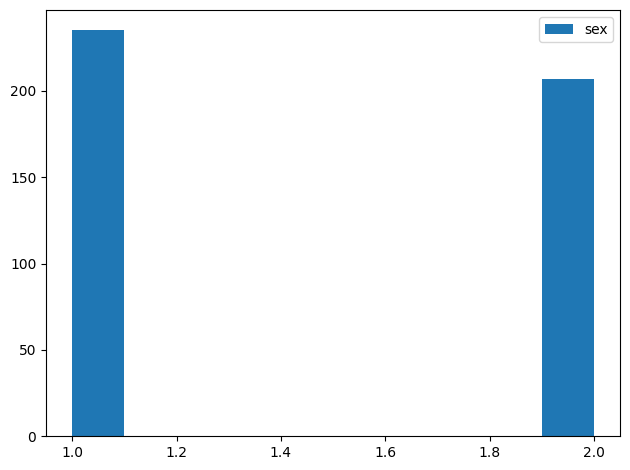

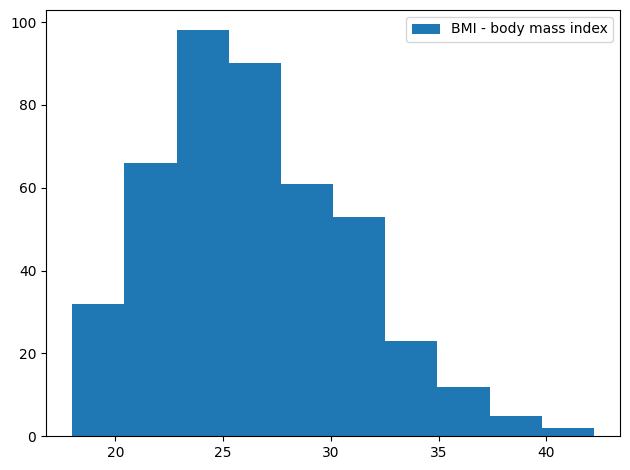

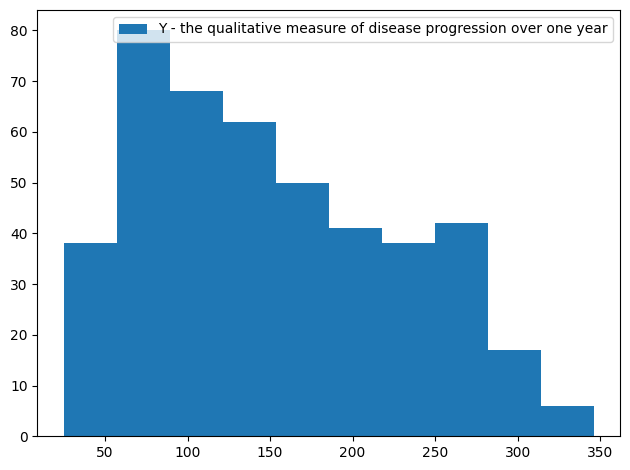

In [36]:
import matplotlib.pyplot as plt

plt.hist(df['AGE'], label="age")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.hist(df['SEX'], label="sex")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.hist(df['BMI'], label="BMI - body mass index")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.hist(df['Y'], label="Y - the qualitative measure of disease progression over one year")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [43]:
print("Correlation of disease progression (Y) and")
for i,n in enumerate(['AGE','SEX','BMI','BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']):
    print(f"{n} = {np.corrcoef(df[n], df['Y'])[0,1]}")

Correlation of disease progression (Y) and
AGE = 0.1878887507189197
SEX = 0.04306199845160536
BMI = 0.5864501344746887
BP = 0.44148175856257094
S1 = 0.21202248101455065
S2 = 0.1740535869687426
S3 = -0.39478925067091836
S4 = 0.43045288474477283
S5 = 0.5658825924427441
S6 = 0.3824834842485809


BMI and S5 have the highest correlation

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [47]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975


Conclusion: p-value close to 0 (typically, below 0.05) would indicate high confidence in our hypothesis. In our case, there is no strong evidence that sex affects progression of diabetes.